In [2]:
import optimiserBank as opt
import functionBank as func
import matplotlib.pyplot as plt
import importlib
importlib.reload(opt)
importlib.reload(func)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc 
from itertools import product
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from sklearn.preprocessing import MinMaxScaler



In [3]:
n_var = 7
n_obj = 3
s = 8

problem, bounds = func.getPyMooProblem('dtlz1', n_var, n_obj)
weightVectors = func.generateWeightVectors(n_obj, s)
print(f'Generated {len(weightVectors)} weight vectors.')

initSampleSize = 50
# bounds = np.array(value)
lowBounds = bounds[:, 0]
highBounds = bounds[:, 1]

# Generate one Latin Hypercube Sample (LHS) for each test function,
# to be used for all optimisers/scalarisers using a population size of 20
sampler = qmc.LatinHypercube(
    d=bounds.shape[0]
)  # Dimension is determined from bounds
sample = sampler.random(n=initSampleSize)
initPopulation = qmc.scale(sample, lowBounds, highBounds)

# Check for and systematically replace NaN values in initial population
# Requires evaluating initial population
initialObjvTargets = np.empty((0, n_obj))


for i in range(initSampleSize):

    newObjvTgt = opt.MOobjective_function(initPopulation[i], problem, n_obj)
    initialObjvTargets = np.vstack((initialObjvTargets, newObjvTgt))

print("Initial Population:")
print(initPopulation)
print("initial targets:\n", initialObjvTargets )

Generated 45 weight vectors.
Initial Population:
[[0.58344277 0.533433   0.70397551 0.77407114 0.98283453 0.32465856
  0.79332621]
 [0.71093936 0.96414802 0.65804194 0.43728557 0.94849167 0.1782399
  0.82103983]
 [0.65500124 0.50549578 0.81786248 0.08195924 0.85961861 0.10625833
  0.69861034]
 [0.77732336 0.09026791 0.18544687 0.03224696 0.74026823 0.90024074
  0.52774831]
 [0.86543014 0.64076282 0.62363815 0.27585457 0.6314031  0.36334303
  0.97259079]
 [0.95665063 0.92522257 0.06040194 0.47150036 0.29678938 0.2918321
  0.40048808]
 [0.19283121 0.39420464 0.30196097 0.60072437 0.14543425 0.21436292
  0.082361  ]
 [0.37357685 0.88809083 0.50048486 0.88952255 0.59515614 0.08376431
  0.80937133]
 [0.75625663 0.19252132 0.96345405 0.34072012 0.3513882  0.07326773
  0.36852506]
 [0.06458308 0.26096011 0.10682976 0.96704184 0.27692897 0.24756052
  0.50575698]
 [0.78765107 0.58847858 0.35927323 0.74495286 0.80894116 0.6884703
  0.26387615]
 [0.67123385 0.78021604 0.02792527 0.28989463 0.4057

In [4]:
ESA = opt.ESA(
    bounds,
    initSampleSize,
    initSampleSize,
    0.25,
    problem,
    func.APD,
    n_obj,
    weightVectors,
    0.9,
    250,
    useInitialPopulation=True,
    initialPopulation=initPopulation,
    initialObjvValues=initialObjvTargets
)
ESA.mainMenu(initialAction=2)

New weight vector = (0.875, 0.125)
No NaN values found.
Running a3!
New weight vector = (1.0, 0.0)
No NaN values found.
Running a4!
Trust Region iteration =  1
New weight vector = (0.75, 0.25)
No NaN values found.
Trust Region iteration =  2
New weight vector = (0.625, 0.375)
No NaN values found.
Trust Region iteration =  3
New weight vector = (0.625, 0.375)
No NaN values found.
QTable at iteration  0
[[0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.0975]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]]
ESA Best result at iteration 0 88.7648529268566
Evaluated points = 54
Running a2!
New weight vector = (0.125, 0.875)
No NaN values found.
QTable at iteration  1
[[0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.0975]
 [0.1    0.1    0.1    0.1   ]

/Users/benmoore/miniconda3/envs/OpenFOAM/lib/python3.11/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


New weight vector = (0.0, 1.0)
No NaN values found.
QTable at iteration  2
[[0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.0975 0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.0975]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.0975 0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]]
ESA Best result at iteration 2 88.7648529268566
Evaluated points = 56
Running a1!
New weight vector = (0.375, 0.625)
No NaN values found.
QTable at iteration  3
[[0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.0975 0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.0975 0.1    0.1    0.0975]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.0975 0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]]
ESA Best result at iteration 3 88.7648529268566
Evaluated points = 57
Running a1!
New weight vector = (0.25, 0.75)
No NaN values found.
QTable at iteration  4
[[0.0975 0.1    0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.0975 0.1   ]
 [0.1    0.1  

/Users/benmoore/miniconda3/envs/OpenFOAM/lib/python3.11/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


New weight vector = (0.625, 0.375)
No NaN values found.
QTable at iteration  5
[[0.0975 0.1    0.0975 0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.1    0.0975 0.1   ]
 [0.1    0.1    0.1    0.1   ]
 [0.0975 0.1    0.1    0.0975]
 [0.1    0.1    0.1    0.1   ]
 [0.1    0.0975 0.1    0.1   ]
 [0.1    0.1    0.1    0.1   ]]
ESA Best result at iteration 5 88.7648529268566
Evaluated points = 59
Running a1!
New weight vector = (0.75, 0.25)
No NaN values found.
QTable at iteration  6
[[0.0975   0.1      0.0975   0.1     ]
 [0.1      0.1      0.1      0.1     ]
 [0.1      0.1      0.0975   0.1     ]
 [0.1      0.1      0.1      0.1     ]
 [0.095625 0.1      0.1      0.0975  ]
 [0.1      0.1      0.1      0.1     ]
 [0.1      0.0975   0.1      0.1     ]
 [0.1      0.1      0.1      0.1     ]]
ESA Best result at iteration 6 88.7648529268566
Evaluated points = 60
Running a2!
New weight vector = (0.75, 0.25)
No NaN values found.
QTable at iteration  7
[[0.0975   0.0975   0.0975   0.1     ]
 [

/Users/benmoore/miniconda3/envs/OpenFOAM/lib/python3.11/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


New weight vector = (0.375, 0.625)
No NaN values found.
QTable at iteration  8
[[0.0975   0.0975   0.0975   0.1     ]
 [0.1      0.1      0.1      0.1     ]
 [0.1      0.1      0.095625 0.1     ]
 [0.1      0.1      0.1      0.1     ]
 [0.095625 0.1      0.1      0.0975  ]
 [0.1      0.1      0.1      0.1     ]
 [0.1      0.0975   0.1      0.1     ]
 [0.1      0.1      0.1      0.1     ]]
ESA Best result at iteration 8 88.7648529268566
Evaluated points = 62
Running a4!
Trust Region iteration =  1
New weight vector = (0.625, 0.375)
No NaN values found.
Trust Region iteration =  2
New weight vector = (0.625, 0.375)
No NaN values found.
Trust Region iteration =  3
New weight vector = (0.625, 0.375)
No NaN values found.
QTable at iteration  9
[[0.0975   0.0975   0.0975   0.1     ]
 [0.1      0.1      0.1      0.1     ]
 [0.1      0.1      0.095625 0.1     ]
 [0.1      0.1      0.1      0.1     ]
 [0.095625 0.1      0.1      0.095625]
 [0.1      0.1      0.1      0.1     ]
 [0.1      0.0975

KeyboardInterrupt: 

New weight vector = (0.125, 0.875)
1
2
No NaN values found.
New weight vector = (0.875, 0.125)
1
2
No NaN values found.
BO Iteration 0, Best found solution =  79.8166621060545
Evaluated points = 51


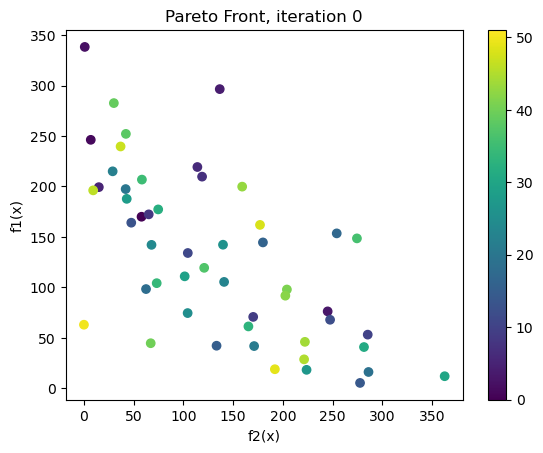

New weight vector = (0.125, 0.875)
1
2
No NaN values found.
BO Iteration 1, Best found solution =  62.0
Evaluated points = 52


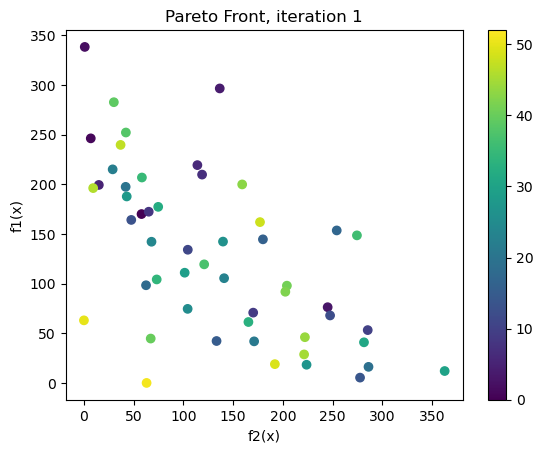

New weight vector = (0.5, 0.5)
1
2
No NaN values found.
BO Iteration 2, Best found solution =  62.0
Evaluated points = 53


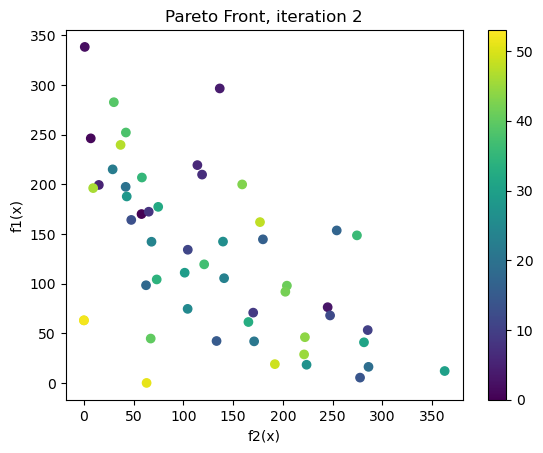

New weight vector = (0.75, 0.25)
1
2
No NaN values found.
BO Iteration 3, Best found solution =  62.0
Evaluated points = 54


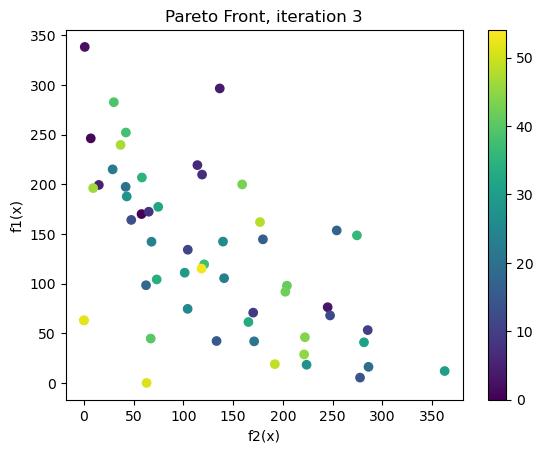

New weight vector = (1.0, 0.0)
1
2
No NaN values found.
BO Iteration 4, Best found solution =  62.0
Evaluated points = 55


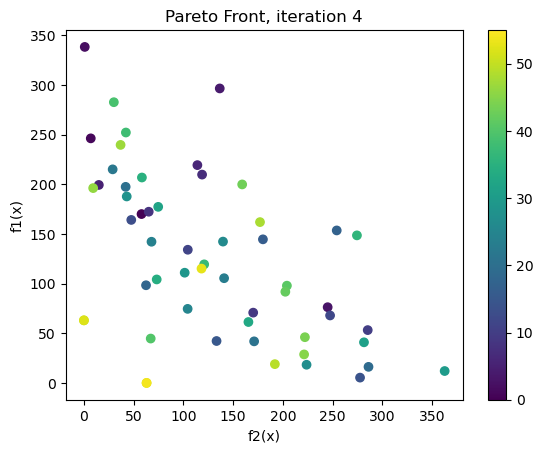

New weight vector = (0.75, 0.25)
1
2
No NaN values found.
BO Iteration 5, Best found solution =  62.0
Evaluated points = 56


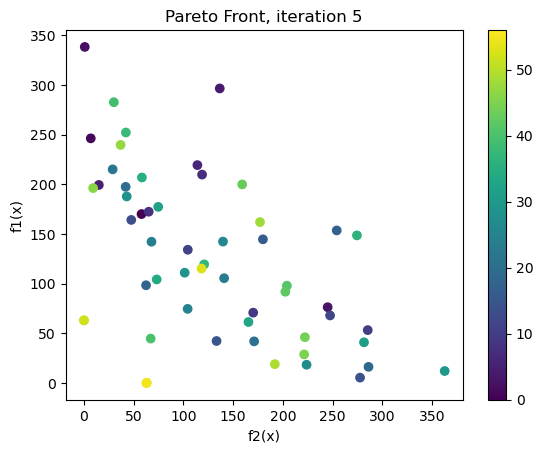

New weight vector = (0.625, 0.375)
1
2
No NaN values found.
BO Iteration 6, Best found solution =  62.0
Evaluated points = 57


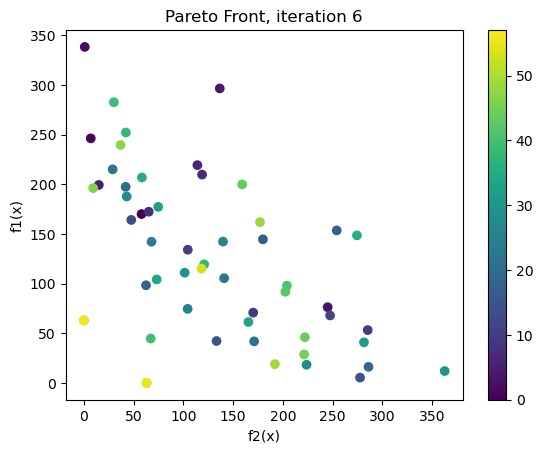

KeyboardInterrupt: 

In [6]:
bayesianRun = opt.bayesianOptimiser(
    bounds,
    initSampleSize,
    problem,
    func.APD,
    n_obj,
    weightVectors,
    useInitialPopulation=True,
    initialPopulation=initPopulation,
    initialObjvValues=initialObjvTargets,
    maxFE=250
)
bayesianRun.runOptimiser()

0.0809678177779046 1.4323477421583914
2


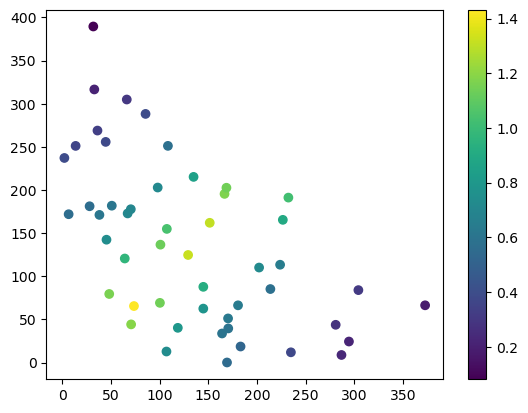

In [10]:
# def angle_penalized_distance(F, ref_dirs, FE, FE_max, alpha, k):
#     """
#     Compute the Angle Penalized Distance (APD) for a set of solutions.
    
#     Parameters:
#         F (numpy.ndarray): Objective values of solutions (m x k matrix).
#         ref_dirs (numpy.ndarray): Reference directions (n x k matrix).
#         FE (int): Current number of function evaluations.
#         FE_max (int): Maximum number of function evaluations.
#         alpha (float): Penalty exponent.
#         k (float): Penalty scaling factor.
    
#     Returns:
#         numpy.ndarray: APD values for each solution.
#     """
#     # Normalize the objective values
#     F_norm = F / np.linalg.norm(F, axis=1, keepdims=True)

#     # Compute cosine similarity and find the nearest reference direction
#     cosine = np.dot(F_norm, ref_dirs.T)
#     nearest_idx = np.argmax(cosine, axis=1)
#     nearest_ref = ref_dirs[nearest_idx]

#     # Compute distances (norm) and angles
#     distances = np.linalg.norm(F - nearest_ref, axis=1)
#     angles = 1 - cosine[np.arange(len(F)), nearest_idx]

#     # Calculate the progress term FE / FE_max
#     progress = FE / FE_max
#     penalty_factor = k * (progress ** alpha)

#     # Compute gamma (minimum angle to other reference vectors)
#     gamma = np.min(1 - cosine, axis=1)

#     # Final APD calculation
#     apd = distances * (1 + penalty_factor * (angles / gamma))
#     return apd

def angle_penalized_distance(F, ref_dirs, FE, FE_max, alpha, k):
    """
    Compute the Angle Penalized Distance (APD) for a set of solutions.
    
    Parameters:
        F (numpy.ndarray): Objective values of solutions (m x k matrix).
        ref_dirs (numpy.ndarray): Reference directions (n x k matrix).
        FE (int): Current number of function evaluations.
        FE_max (int): Maximum number of function evaluations.
        alpha (float): Penalty exponent.
        k (float): Penalty scaling factor.
    
    Returns:
        numpy.ndarray: APD values for each solution.
    """
    # Normalize the objective values
    F_norm = F / np.linalg.norm(F, axis=1, keepdims=True)

    # Compute cosine similarity and find the nearest reference direction
    cosine = np.dot(F_norm, ref_dirs.T)
    nearest_idx = np.argmax(cosine, axis=1)  # Index of the nearest reference direction
    nearest_ref = ref_dirs[nearest_idx]      # Nearest reference directions for each solution

    # Compute distances (Euclidean norm) between F and their nearest reference vector
    distances = np.linalg.norm(F - nearest_ref, axis=1)

    # Compute the angle (1 - cosine) between each solution and its nearest reference vector
    angles = 1 - cosine[np.arange(len(F)), nearest_idx]

    # Calculate gamma (minimum angle between the selected reference vector and other reference vectors)
    gamma_values = []
    for idx in nearest_idx:
        # Compute angles (cosine values) between the chosen reference vector and all other reference vectors
        selected_ref = ref_dirs[idx]  # The reference vector assigned to the current solution
        other_refs = np.delete(ref_dirs, idx, axis=0)  # Remove the selected reference vector
        cosine_to_others = np.dot(selected_ref, other_refs.T)
        gamma = 1 - np.max(cosine_to_others)  # Smallest angle (highest cosine similarity)
        gamma_values.append(gamma)
    gamma_values = np.array(gamma_values)

    # Calculate the progress term FE / FE_max
    progress = FE / FE_max
    penalty_factor = k * (progress ** alpha)

    # Compute the APD value for each solution
    apd = distances * (1 + penalty_factor * (angles / gamma_values))
    return apd




# ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=10)
ref_dirs = get_reference_directions("das-dennis", len(initialObjvTargets[-1]), n_partitions=len(initialObjvTargets[-1])*3)

scaler = MinMaxScaler(feature_range=(0, 1))

objsNormalised = scaler.fit_transform(initialObjvTargets)

scaledRefs = scaler.fit_transform(ref_dirs)

apdValues = angle_penalized_distance(objsNormalised, scaledRefs, 50, 100, 2, k=n_obj)

plt.scatter(initialObjvTargets[:,0], initialObjvTargets[:,1], c=apdValues)
plt.colorbar()

print(np.min(apdValues), np.max(apdValues))
print(len(initialObjvTargets[-1]))


APD Values: [186.75497782 202.1708135  336.25391399 ... 218.88066215 303.845496
 352.87512823]


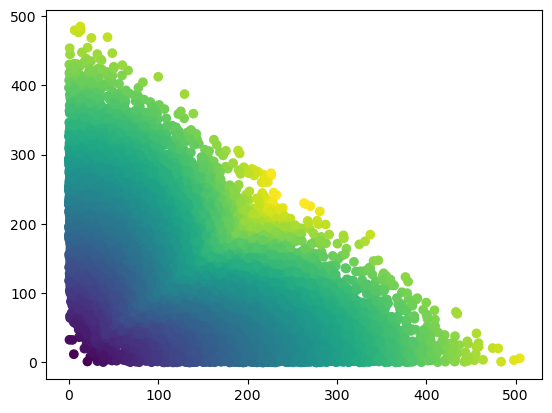

In [26]:
import numpy as np
from pymoo.util.ref_dirs import get_reference_directions

def angle_penalized_distance(F, ref_dirs, alpha):
    """
    Compute the Angle Penalized Distance (APD) for a set of solutions.
    
    Parameters:
        F (numpy.ndarray): Objective values of solutions (m x k matrix).
        ref_dirs (numpy.ndarray): Reference directions (n x k matrix).
        alpha (float): Penalty factor.
    
    Returns:
        numpy.ndarray: APD values for each solution.
    """
    # Normalize objective values (to ensure correct angles)
    F_norm = F / np.linalg.norm(F, axis=1, keepdims=True)

    # Find the cosine similarity between solutions and reference directions
    cosine = np.dot(F_norm, ref_dirs.T)

    # For each solution, find the nearest reference direction
    nearest_idx = np.argmax(cosine, axis=1)
    nearest_ref = ref_dirs[nearest_idx]

    # Calculate distances and angles
    distances = np.linalg.norm(F - nearest_ref, axis=1)
    angles = 1 - cosine[np.arange(len(F)), nearest_idx]  # Angle penalty (1 - cos)

    # Calculate APD
    apd = distances * (1 + alpha * angles)
    return apd


# Example Usage
if __name__ == "__main__":
    # Generate reference directions for k = 3 objectives
    ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=10)

    # Example objective values for 5 solutions
    F = np.array([
        [0.2, 0.4, 0.4],
        [0.1, 0.7, 0.2],
        [0.6, 0.3, 0.1],
        [0.3, 0.3, 0.4],
        [0.5, 0.5, 0.0]
    ])

    # Compute APD for each solution with alpha = 0.1
    alpha = 2
    apd_values = angle_penalized_distance(initialObjvTargets, ref_dirs, alpha)
    print("APD Values:", apd_values)


plt.scatter(initialObjvTargets[:,0], initialObjvTargets[:,1], c=apd_values)

In [133]:
import itertools
import numpy as np

def generate_weight_vectors(k, s):
    """
    Generate the set of weight vectors Λ for k objectives and granularity s.
    
    Parameters:
        k (int): Number of objectives (dimensions of the weight vector).
        s (int): Granularity (number of divisions for each weight component).
    
    Returns:
        list of tuples: A list containing all possible weight vectors in Λ.
    """
    # Generate all combinations of s+1 integers that sum to s
    levels = range(s + 1)  # Possible values for each λ_j: {0, 1/s, 2/s, ..., 1}
    print(levels)
    combinations = [comb for comb in itertools.product(levels, repeat=k-1)]

    
    # Convert combinations into weight vectors (ensure they sum to 1)
    weight_vectors = []
    for comb in combinations:
        lam = np.zeros(k)
        # print(lam, comb)
        lam[:k-1] = np.array(comb) / s
        lam[-1] = 1 - sum(lam[:-1])  # Ensure sum of λ equals 1
        if all(0 <= val <= 1 for val in lam):
            weight_vectors.append(tuple(lam))
    
    return weight_vectors


def sample_weight_vector(weight_vectors):
    """
    Randomly sample a weight vector from the generated set Λ.
    
    Parameters:
        weight_vectors (list of tuples): The set of all possible weight vectors.
    
    Returns:
        tuple: A randomly selected weight vector.
    """

    print(len(weight_vectors))
    print(np.linspace(0, len(weight_vectors), len(weight_vectors)+1))

    idx = int(np.random.choice(np.linspace(0, len(weight_vectors)-1, len(weight_vectors))))
    print(idx)
    return weight_vectors[idx]



# Example Usage
if __name__ == "__main__":
    k = 5  # Number of objectives
    s = 8  # Granularity

    # Step 1: Generate the weight vector set Λ
    weight_vectors = generate_weight_vectors(k, s)
    print(f"Generated {len(weight_vectors)} weight vectors:")
    for wv in weight_vectors:
        print(wv)

    # Step 2: Randomly sample a weight vector λ
    sampled_lambda = sample_weight_vector(weight_vectors)
    print(f"\nSampled weight vector: {sampled_lambda}")


range(0, 9)
Generated 495 weight vectors:
(0.0, 0.0, 0.0, 0.0, 1.0)
(0.0, 0.0, 0.0, 0.125, 0.875)
(0.0, 0.0, 0.0, 0.25, 0.75)
(0.0, 0.0, 0.0, 0.375, 0.625)
(0.0, 0.0, 0.0, 0.5, 0.5)
(0.0, 0.0, 0.0, 0.625, 0.375)
(0.0, 0.0, 0.0, 0.75, 0.25)
(0.0, 0.0, 0.0, 0.875, 0.125)
(0.0, 0.0, 0.0, 1.0, 0.0)
(0.0, 0.0, 0.125, 0.0, 0.875)
(0.0, 0.0, 0.125, 0.125, 0.75)
(0.0, 0.0, 0.125, 0.25, 0.625)
(0.0, 0.0, 0.125, 0.375, 0.5)
(0.0, 0.0, 0.125, 0.5, 0.375)
(0.0, 0.0, 0.125, 0.625, 0.25)
(0.0, 0.0, 0.125, 0.75, 0.125)
(0.0, 0.0, 0.125, 0.875, 0.0)
(0.0, 0.0, 0.25, 0.0, 0.75)
(0.0, 0.0, 0.25, 0.125, 0.625)
(0.0, 0.0, 0.25, 0.25, 0.5)
(0.0, 0.0, 0.25, 0.375, 0.375)
(0.0, 0.0, 0.25, 0.5, 0.25)
(0.0, 0.0, 0.25, 0.625, 0.125)
(0.0, 0.0, 0.25, 0.75, 0.0)
(0.0, 0.0, 0.375, 0.0, 0.625)
(0.0, 0.0, 0.375, 0.125, 0.5)
(0.0, 0.0, 0.375, 0.25, 0.375)
(0.0, 0.0, 0.375, 0.375, 0.25)
(0.0, 0.0, 0.375, 0.5, 0.125)
(0.0, 0.0, 0.375, 0.625, 0.0)
(0.0, 0.0, 0.5, 0.0, 0.5)
(0.0, 0.0, 0.5, 0.125, 0.375)
(0.0, 0.0, 0.5, 0

In [82]:
import itertools
import numpy as np

def generate_weight_vectors(k, s):
    """
    Generate the set of evenly spaced weight vectors Λ for k objectives and granularity s.
    
    Parameters:
        k (int): Number of objectives (dimensions of the weight vector).
        s (int): Granularity (number of divisions for each weight component).
    
    Returns:
        list of tuples: A list containing all possible weight vectors in Λ.
    """
    # Generate all non-negative integer partitions of `s` into `k` parts
    partitions = [comb for comb in itertools.combinations_with_replacement(range(s + 1), k - 1)]
    
    weight_vectors = []
    for partition in partitions:
        # Create a weight vector from the partition
        lam = np.zeros(k)
        lam[:k - 1] = partition
        lam[-1] = s - sum(partition)
        
        # Normalize to sum to 1
        weight_vector = tuple(np.array(lam) / s)
        if all(0 <= val <= 1 for val in weight_vector):
            weight_vectors.append(weight_vector)
    
    return weight_vectors


# Example Usage
if __name__ == "__main__":
    k = 3  # Number of objectives
    s = 2  # Granularity

    # Generate weight vectors
    weight_vectors = generate_weight_vectors(k, s)
    print(f"Generated {len(weight_vectors)} weight vectors:")
    for wv in weight_vectors:
        print(wv)


Generated 4 weight vectors:
(0.0, 0.0, 1.0)
(0.0, 0.5, 0.5)
(0.0, 1.0, 0.0)
(0.5, 0.5, 0.0)


In [6]:
dtlz1 = get_problem("dtlz1", n_var=4, n_obj=2)

test = np.full((1,4),0.6)
result = dtlz1.evaluate(test)

result = np.append(result, [0])

lower = dtlz1.xl
upper = dtlz1.xu

bounds = []

for i in range(4):
    bounds.append([lower[i], upper[i]])

print(bounds)
print(dtlz1.xl)


print(result, result.shape)

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]
[0. 0. 0. 0.]
[1.2 0.8 0. ] (3,)


In [3]:
dtlzProblems = ['dtlz1','dtlz2','dtlz3','dtlz4','dtlz5','dtlz6','dtlz7',]
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=100)

pareto = get_problem("dtlz1").pareto_front(ref_dirs)

print(pf)
# Scatter(angle=(45,45)).add(pf).show()

[[0.    0.5  ]
 [0.005 0.495]
 [0.01  0.49 ]
 [0.015 0.485]
 [0.02  0.48 ]
 [0.025 0.475]
 [0.03  0.47 ]
 [0.035 0.465]
 [0.04  0.46 ]
 [0.045 0.455]
 [0.05  0.45 ]
 [0.055 0.445]
 [0.06  0.44 ]
 [0.065 0.435]
 [0.07  0.43 ]
 [0.075 0.425]
 [0.08  0.42 ]
 [0.085 0.415]
 [0.09  0.41 ]
 [0.095 0.405]
 [0.1   0.4  ]
 [0.105 0.395]
 [0.11  0.39 ]
 [0.115 0.385]
 [0.12  0.38 ]
 [0.125 0.375]
 [0.13  0.37 ]
 [0.135 0.365]
 [0.14  0.36 ]
 [0.145 0.355]
 [0.15  0.35 ]
 [0.155 0.345]
 [0.16  0.34 ]
 [0.165 0.335]
 [0.17  0.33 ]
 [0.175 0.325]
 [0.18  0.32 ]
 [0.185 0.315]
 [0.19  0.31 ]
 [0.195 0.305]
 [0.2   0.3  ]
 [0.205 0.295]
 [0.21  0.29 ]
 [0.215 0.285]
 [0.22  0.28 ]
 [0.225 0.275]
 [0.23  0.27 ]
 [0.235 0.265]
 [0.24  0.26 ]
 [0.245 0.255]
 [0.25  0.25 ]
 [0.255 0.245]
 [0.26  0.24 ]
 [0.265 0.235]
 [0.27  0.23 ]
 [0.275 0.225]
 [0.28  0.22 ]
 [0.285 0.215]
 [0.29  0.21 ]
 [0.295 0.205]
 [0.3   0.2  ]
 [0.305 0.195]
 [0.31  0.19 ]
 [0.315 0.185]
 [0.32  0.18 ]
 [0.325 0.175]
 [0.33  0.

In [26]:
problem, bounds = func.getPyMooProblem('dtlz1', 4, 2)

# sample = .array((7.945126785134599690e-01, 1.117080453219960745e-01, 3.647062041950427380e-02, 1.404519350338756800e-01))
# sample = np.loadtxt('dtlzRunI/BOFeaturesdtlz1HypI.txt')[:20]
sample = np.full((1,4),0)
print(sample.shape)
print(bounds)
print(problem)
result = func.evalPyMooProblem(problem, sample)

print(result)

(1, 4)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
# name: DTLZ1
# n_var: 4
# n_obj: 2
# n_ieq_constr: 0
# n_eq_constr: 0

[[ 0. 38.]]


In [ ]:
weights = np.array((0.25, 1, 0.25, 0.5))
functionDict = {
                # func.binhAndKorn:[(0,5), (0,3)]
                # func.chankongHaimes:[(-20,20), (-20,20)]
                # func.fonsecaFleming:[(-4,4), (-4,4)] 
                # func.ctp1:[(0,1), (0,1)], 
                # func.constrEx:[(0.1,1), (0,5)]
                # func.testFunction4:[(-7,4), (-7,4)]
                func.viennetFunction:[(-3,3), (-3,3)]
                }

In [ ]:
for key, value in functionDict.items():

    functionOutput = np.zeros((0,4))

    print(value)
    print(value.shape)

    x_range = np.linspace(value[0][0], value[0][1], 75)
    y_range = np.linspace(value[1][0], value[1][1], 75)
    fullRange = list(product(x_range, y_range))
    fullRangeArray = np.array(fullRange)
    for i in range(0, len(fullRangeArray)):
        # print(fullRangeArray[i])
        functionOutput = np.vstack((functionOutput, opt.MOobjective_function(fullRangeArray[i], key, 4)))

pareto = func.computeParetoShells(functionOutput)[0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.scatter(functionOutput[:,0], functionOutput[:,1], functionOutput[:,2])
ax.scatter(pareto[:,1], pareto[:,0], pareto[:,2])
ax.invert_yaxis()
ax.view_init(azim=160)

plt.show()

[(-3, 3), (-3, 3)]


AttributeError: 'list' object has no attribute 'shape'

In [ ]:


for key, value in functionDict.items():
    print(key.__name__, value)

    initSampleSize = 20
    bounds = np.array(value)
    lowBounds = bounds[:, 0]
    highBounds = bounds[:, 1]

    # Generate one Latin Hypercube Sample (LHS) for each test function,
    # to be used for all optimisers/scalarisers using a population size of 20
    sampler = qmc.LatinHypercube(
        d=bounds.shape[0]
    )  # Dimension is determined from bounds
    sample = sampler.random(n=initSampleSize)
    initPopulation = qmc.scale(sample, lowBounds, highBounds)

    # Check for and systematically replace NaN values in initial population
    # Requires evaluating initial population
    initialObjvTargets = np.empty((0, len(bounds)+2))

    # objvTargets = opt.MOobjective_function(initPopulation, key, bounds.shape[0])

    for i in range(initSampleSize):
        # print(i)
        # candidate = initPopulation[i]
        newObjvTgt = opt.MOobjective_function(initPopulation[i], key, (bounds.shape[0]+2))

        # # Replace NaN values in the objective function result with valid samples
        # while np.any(np.isnan(newObjvTgt)):
        #     candidate = np.random.uniform(
        #         lowBounds, highBounds
        #     )  # Match dimension automatically
        #     newObjvTgt = opt.MOobjective_function(candidate, key, bounds.shape[0])
        #     initPopulation[i] = candidate
        initialObjvTargets = np.vstack((initialObjvTargets, newObjvTgt))

    print("Initial Population:")
    print(initPopulation)
    print("initial targets:\n", initialObjvTargets )
    print(len(bounds)+1)

    # bayesianRun = opt.BOZeroMax(value, 15, key, func.augmentedChebychev, len(bounds)+1, weights, useInitialPopulation=True, initialPopulation=initPopulation, initialObjvValues=initialObjvTargets, maxFE=100)
    # bayesianRun.runOptimiser()

    bayesianRun = opt.bayesianOptimiser(value, 15, key, func.augmentedChebychev, len(bounds)+1, weights, useInitialPopulation=True, initialPopulation=initPopulation, initialObjvValues=initialObjvTargets, maxFE=100)
    bayesianRun.runOptimiser()    # ESA = opt.ESA(value, 20, 10, 0.25, key, func.weightedNorm, 2, weights, 0.9, 80, useInitialPopulation=True, initialPopulation=initPopulation)
    # # ESA.mainMenu(initialAction=2)

    # PSO = opt.TS_DDEO(
    #     value,
    #     20,
    #     key,
    #     func.augmentedChebychev,
    #     4,
    #     weights,
    #     useInitialPopulation=True,
    #     initialPopulation=initPopulation,
    #     initialObjvValues=initialObjvTargets
    # )
    # PSO.stage1()
    # PSO.stage2()

viennetFunction [(-3, 3), (-3, 3)]
Initial Population:
[[-1.7971175  -0.40574772]
 [ 2.90293289  1.90975336]
 [ 2.46322247  2.9169801 ]
 [-0.75214751 -2.92791693]
 [-0.30576796  0.83647331]
 [-2.32541484 -1.41278109]
 [-2.52287235  0.48948628]
 [ 0.25777906  2.49356901]
 [ 0.89112305 -0.11467358]
 [-1.49943025 -1.96846567]
 [ 1.07366884 -0.66612135]
 [ 1.22762818  2.20407982]
 [-1.08793341  1.7433516 ]
 [-0.2433879  -1.79035665]
 [ 0.55019912  0.23780892]
 [-2.93377424 -1.12238454]
 [ 1.67903303 -2.68126932]
 [ 2.22026364 -2.27162957]
 [-1.96454452  1.48433848]
 [ 1.92168938  1.06889973]]
initial targets:
 [[ 1.44714132e+00  1.50477023e+01  1.90647643e-01  0.00000000e+00]
 [ 5.56452862e+00  2.50245784e+01  7.64803730e-02  0.00000000e+00]
 [ 8.19326594e+00  1.88692865e+01  6.41998408e-02  0.00000000e+00]
 [ 4.85166879e+00  2.25923810e+01  9.85164628e-02  0.00000000e+00]
 [ 1.10917988e+00  1.52491736e+01  6.00245598e-02  0.00000000e+00]
 [ 4.60199177e+00  1.50031208e+01  1.18327946e-01  

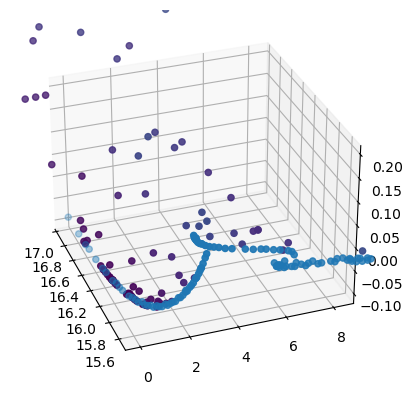

In [ ]:
tsF = np.loadtxt('TSDDEOFeatures.txt')
tsO = np.loadtxt('TSDDEOObjectiveTargets.txt')
tsS = np.loadtxt('TSDDEOTargets.txt')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(tsO[:,1], tsO[:,0], tsO[:,2], c=tsS)
ax.scatter(pareto[:,1], pareto[:,0], pareto[:,2])
ax.set_xlim(15.5, 17)
ax.invert_yaxis()
ax.view_init(azim=160)
plt.show()

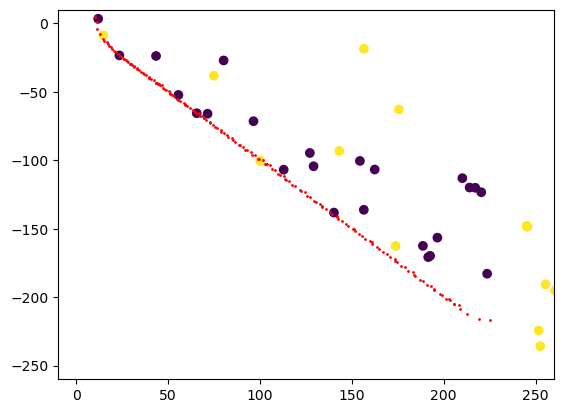

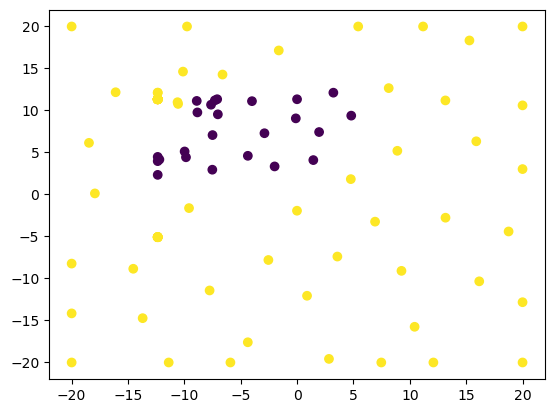

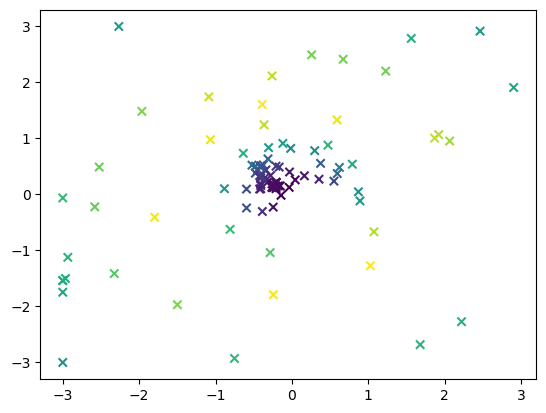

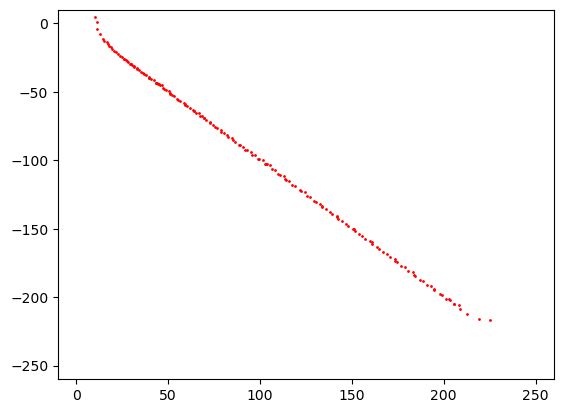

In [ ]:
minmax = np.loadtxt('BOMinMaxObjectiveTargets.txt')
max = np.loadtxt('BOObjectiveTargets.txt')
mmObjv3 = np.loadtxt('BOMinMaxObjectiveTargets.txt')[:,2]
mObjv3 = np.loadtxt('BOObjectiveTargets.txt')[:,2]

tsF = np.loadtxt('TSDDEOFeatures.txt')
tsO = np.loadtxt('TSDDEOObjectiveTargets.txt')
tsS = np.loadtxt('TSDDEOTargets.txt')

paretoFront = np.loadtxt('paretoFronts/chankongHaimesPareto.txt')

# plt.scatter(max[:,0], max[:,1], alpha = 1, marker='x', c = mObjv3)
plt.scatter(minmax[:,0], minmax[:,1], alpha = 1, c = mmObjv3)
plt.scatter(paretoFront[:,0], paretoFront[:,1], c='red', s=1)

plt.xlim(-10, 260)
plt.ylim(-260,10)
plt.show()


# [(-10,260), (-260,10)]

mmFeatures = np.loadtxt('BOMinMaxFeatures.txt')
# mmObjv3 = np.loadtxt('BOMinMaxObjectiveTargets.txt')[:,2]
mFeatures = np.loadtxt('BOFeatures.txt')

# plt.scatter(mFeatures[:,0], mFeatures[:,1], alpha = 1, marker='x' ,c = mObjv3)
plt.scatter(mmFeatures[:,0], mmFeatures[:,1], alpha = 1, c = mmObjv3)

plt.show()
plt.scatter(tsF[:,0], tsF[:,1], alpha = 1, marker='x' ,c = tsO[:,2])
plt.show()

plt.scatter(tsO[:,0], tsO[:,1], alpha = 1, marker='x' ,c = tsO[:,2])
plt.scatter(paretoFront[:,0], paretoFront[:,1], c='red', s=1)
plt.xlim(-10, 260)
plt.ylim(-260,10)
plt.show()


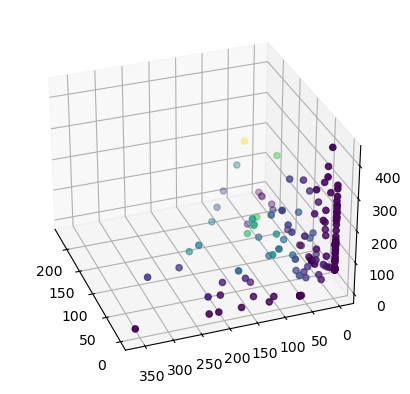

In [9]:
features = np.loadtxt('BOFeatures.txt')
objTargets = np.loadtxt('BOObjectiveTargets.txt')
scTargets = np.loadtxt('BOScalarisedTargets.txt')

# best_idx = np.argmin(scTargets)
# bestFeature = features[best_idx]
# bestTarget = scTargets[best_idx]

# gp = opt.GPTrain(features, scTargets, meanPrior='zero')
# eiDEGlobal = opt.BayesianDifferentialEvolution(gp, bounds, bestTarget)
# newSolution, newFitness = eiDEGlobal.optimize()

# plt.scatter(objTargets[:,0], objTargets[:,1], c=scTargets)
# plt.ylim(0,10)
# plt.xlim(,10)
# plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(objTargets[:,1], objTargets[:,0], objTargets[:,2], c=scTargets)
# ax.scatter(pareto[:,1], pareto[:,0], pareto[:,2])
# ax.set_xlim(15.5, 17)
# ax.invert_yaxis()
ax.view_init(azim=160)
plt.show()